<hr style="border: 2px solid green;" />

## Комментарий ревьювера 2
Спасибо за доработки🤝

Есть критические моменты в комментариях к гипотезам.


В версии `jupyter hub`, где проверяются работы, версия `matplotlib==3.1.0` (в ней есть баг, который вызывает ошибку), у тебя версия выше и в ней всё работает правильно. Мы обязательно обновим версию, чтобы подобных накладок не возникало.

Но пока имей ввиду, лучше использовать версию, `3.1.0`

<hr style="border: 2px solid green;" />

## Комментарий ревьювера

Андрей, привет! 

🤚Меня зовут, Олег Юрьев, я буду проверять твой проект.

🤝Спасибо, что сдал проект вовремя. Тобой проделана большая работа, молодец! 

Комментарии оставил по ходу работы. К сожалению, дальше 10 ячейки проверить не удалось, возникает ошибка `Invalid RGBA argument: masked` -  пожалуйста исправь её и отправляй на проверку⚙️

✏️В этой тетрадке ты найдешь мои комментарии.

Комментарии будут выделены:
## <span style="color:green">Отличная работа<span>
    Безупречная работа
## <span style="color:orange">Что можно улучшить<span>
    Ничего дорабатывать не надо, данные пункты работают нормально, но есть способы улучшить.
## <span style="color:red">Что необходимо доработать<span>
    Такие пункты необходимо исправить в первую очередь, чтобы я смог принять проект.
 
Не удаляй комментарии, так будем следить за динамикой 📈
   
    
Поехали! :)

<hr style="border: 2px solid green;" />

## Сборный проект

Опираясь на данные о мировых продажах компьютерных игр, нам необходимо выявить потенциально наиболее популярный продукт. Это позволит спланировать рекламные кампании.

Исследование проводится для интернет-магазина "Стримчик", продающего компьютерные игры по всему миру. 

У нас есть данные о продажах в различных регионах, рейтингах игроков и экспертов в разрезе жанров и платформ, а также данные о категории, присвоенные ESRB.

## <span style="color:orange">Что можно улучшить<span>
К описанию проекта можно добавить описание данных, план (или оглавление) исследования (какие задачи стоят перед исследованием, какие вопросы будут рассмотрены).

Это поможет тебе четко следовать выбранной последовательности и не упустить ничего, а твоим коллегам даст понять охваченные вопросы и, например, сразу переходить к нужной главе.
    
Хочется красоты, пожалуйста:
 - автоматическое оглавление - https://github.com/kmahelona/ipython_notebook_goodies
 - ручное оглавление - https://stackoverflow.com/questions/21151450/how-can-i-add-a-table-of-contents-to-a-jupyter-jupyterlab-notebook

## Содержание проекта  <a class="anchor" id="0-bullet">
* [Импорт библиотек](#1-bullet)
* [Шаг 1. Открытие данных](#2-bullet)
* [Шаг 2. Подготовка данных](#3-bullet)
* [Шаг 3. Исследовательский анализ данных](#4-bullet)
* [Шаг 4. Составление портрета пользователя каждого региона](#5-bullet)
* [Шаг 5. Проверка гипотез](#6-bullet)
* [Шаг 6. Общий вывод](#7-bullet)

Возврат к содержанию 
### Импорт библиотек <a class="anchor" id="1-bullet"></a>
👈[назад к оглавлению](#0-bullet)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Возврат к содержанию 
### Шаг 1. Открытие данных <a class="anchor" id="1-bullet"></a>
👈[назад к оглавлению](#0-bullet)

Для начала проведем анализ данных, находящихся в файле.

In [2]:
# C:/Users/IAS/OneDrive/Документы/Yandex_Praktikum/Games_analysis_v2/
# C:/Users/Lenovo/OneDrive/Документы/Yandex_Praktikum/Games_analysis_v2/
# C:/Users/Venik/Documents/

games_data = pd.read_csv('/datasets/games.csv')
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games_data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2947,MotionSports,X360,2010.0,Sports,0.38,0.25,0.00,0.06,40.0,4.4,T
13434,Atelier Ayesha: The Alchemist of Dusk,PSV,2014.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
8889,The Incredibles: Rise of the Underminer,DS,2005.0,Action,0.13,0.01,0.00,0.01,54.0,tbd,E10+
8474,Hot Wheels Velocity X,GBA,2002.0,Racing,0.12,0.04,0.00,0.00,NaN,NaN,NaN
5533,Frogger II: Threeedeep!,2600,1983.0,Action,0.31,0.02,0.00,0.00,NaN,NaN,NaN
2983,Mercenaries: Playground of Destruction,XB,2005.0,Action,0.54,0.11,0.00,0.03,NaN,NaN,NaN
489,Pac-Man Collection,GBA,2001.0,Puzzle,2.07,0.77,0.05,0.05,79.0,7.8,E
11669,Urban Reign,PS2,2005.0,Action,0.04,0.03,0.00,0.01,60.0,8.2,T
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN
12902,Unsolved Crimes,DS,2008.0,Adventure,0.04,0.01,0.00,0.00,66.0,tbd,T


In [4]:
games_data.duplicated().unique()

array([False])

### Итак, что мы видим в результате анализа. 
 - Данные об объемах продаж каждой игры заполнены. 
 - Есть две строки без имени и две строки без жанра игры. 
 - Порядка 300 строк с незаполненным годом выпуска. 
 - Отзывы критиков заполнены менее чем в половине случаев, 
 - Рейтинг пользователей и категория по ESRB заполнены более чем в 50% случаев.
 - Дублей строк нет.
 
Обработаем данные, чтобы получить пригодную для анализа выборку.

Для начала приведем названия колонок к нижнему регистру и переименуем их в некоторых случаях

## <span style="color:orange">Что можно улучшить<span>
 - обзор данных (используй методы `head`, `tail`, `dtypes`, `info`, `describe`, `isna`, `duplicated`) чтобы со всех сторон рассмотреть данные👀

## <span style="color:red">Что необходимо доработать<span>
Вероятно, здесь должен быть некий заголовок.
    
Попробуй использовать последовательность для структуризации работы:
 - обзор данных (используй методы `head`, `tail`, `dtypes` и др)
 - предобработка (`filter`, `fillna`, `pd.to_datetime`, `astype` и др)
 - подготовка (формирование нужных таблиц, полей, агрегатов)
 - основные этапы анализа данных
    
В начале каждого раздела удобно привести некоторую вводную, что будет реализовано в разделе

### <span style="color:darkgreen">Олег, привет!<span>

 1. По **обзору данных** мне больше всего нравятся методы `sample` и `info`. Метод `duplicated`, согласен, дорбавил.

 2. Что касается использования **методов предобработки**, вроде использовал их (разве что за исключением `pd.to_datetime`, но он тут как раз не к месту.

 3. По формированию нужных **таблиц и аграгатов**. Возможно, стоит сразу сделать необходимые выборки, но я предпочитаю их делать там, где либо строю график, либо делаю какие-либо вычисления. Чтобы не бегать по тетрадке при необходимости исправления.

 4. **Этапы анализа данных** добавил и добавил краткое описание к ним.

## <span style="color:green">Отличная работа<span>
Отлично, последовательность примерная, главное чтобы работа имела структуру, а методы, естественно каждый раз набор отличается, всегда на выбор аналитика

### Шаг 2. Подготовка данных <a class="anchor" id="3-bullet"></a>
👈[назад к оглавлению](#0-bullet)

Для того, чтобы данные возможно было анализировать, необходимо их привести в корректный вид. Для этого выполним следующие действия:
 1. Преобразуем наименования колонок (уберем лишние символы и символы в верхнем регистре).
 2. Заменим пропуски в данных (колонки с рейтингами критиков и пользователей, рейтинг ESRB, год выпуска и пр.).
 3. Приведем колонки к необходимым типам (год выпуска, рейтинги).
 4. Добавим дополнительные параметры для анализа (общемировые продажи)

In [5]:
# Переименуем колонки
games_data.columns = ['game_name',
                      'platform',
                      'year_of_release',
                      'genre','na_sales',
                      'eu_sales',
                      'jp_sales',
                      'other_sales',
                      'critic_score',
                      'user_score_str',
                      'rating']

Теперь разберемся со строками, где не заполнен жанр или имя игры. Проверим, не одни ли это и те же строки.

In [6]:
# Заменим пропущенные значения в колонках 'game_name' и 'genre' на 'not defined'
games_data['game_name'].fillna('not defined', inplace = True)
games_data['genre'].fillna('not defined', inplace = True)

games_data.query('game_name == "not defined"')

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score_str,rating
659,not defined,GEN,1993.0,not defined,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,not defined,GEN,1993.0,not defined,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это действительно одни и те же строки, удалим их, т.к. для нашего анализа они не несут никакой полезной информации.

In [7]:
# Удалим строки, с неопределенным именем игры
games_data = games_data[games_data['game_name']!='not defined']

# Заменим пропуски в годе выпуска на '0'
games_data['year_of_release'].fillna(0, inplace=True)
games_data.query('year_of_release == 0').sample(5)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score_str,rating
12235,National Geographic Challenge!,X360,0.0,Misc,0.06,0.00,0.00,0.00,NaN,NaN,NaN
14597,Samurai Spirits: Tenkaichi Kenkakuden,PS2,0.0,Fighting,0.00,0.00,0.03,0.00,NaN,NaN,NaN
11954,Dead Island: Riptide,PC,0.0,Action,0.00,0.07,0.00,0.01,61.0,6,M
5070,The Golden Compass,PSP,0.0,Action,0.11,0.16,0.00,0.10,28.0,4.1,E10+
15795,Shonen Jump's Yu-Gi-Oh! GX Card Almanac,DS,0.0,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN


В годе выпуска заменили пропуски на '0'. Не удаляли, оставили для дальнейшей обработки. Теперь обработаем рейтинги пользователей и критиков. Т.к. пустых значений достаточно много, не будем удалять строки из общей таблицы, заменим их отрицательными значениями для дальнейшей обработки. Также сразу приведем рейтинг пользователей к тому же виду, что и рейтинг критиков.

In [8]:
# Заменим пропуски в столбце с рейтингом критиков на '-1'
games_data['critic_score'].fillna(-1, inplace=True)

# Заменим пропуски в столбце с рейтингом пользователей на '-0.1'
games_data['user_score_str'].fillna('-0.1', inplace=True)

# Значения 'tbd', заменим на '-0.2', т.к. по моему мнению это 'to be defined'
# Можно было бы и '-0.1', но надо же хоть как-то их потом различать
games_data['user_score_str'].replace('tbd', '-0.2', inplace=True)

# Умножим столбец с рейтингом пользователей на 10и приведем к целому типу
games_data['user_score_str'] = pd.to_numeric(games_data['user_score_str'])
games_data['user_score'] = games_data['user_score_str']*10
games_data['user_score'] = games_data['user_score'].astype('int')

# Приведем к целочисленному колонку с рейтингом критиков
games_data['critic_score'] = games_data['critic_score'].astype('int')

# Приведем к целочисленному колонку с годом
games_data['year_of_release'] = games_data['year_of_release'].astype('int')


В результате обработки мы получили столбцы с рейтингом пользователей и критиков в едином целочисленном виде с возможными значениями от 0 до 100.
Заодно привели колонку с годом выпуска к целому. Нет необходимости хранить год в "плавающем" виде. Дробных годов не бывает.
Теперь обработаем пропуски в поле с рейтингом игры от ESRB.

In [9]:
# Неопределенные значения в колонке 'rating' заменим пока на 'ND' (not defined)
# будем учитывать при расчете влияния этого рейтинга на продажи в регионах
games_data['rating'].fillna('ND', inplace=True)

# Нашел еще одну строку с рейтингом RP. Его тоже заменим на ND
games_data['rating'].replace('RP', 'ND', inplace=True)

Теперь вычислим данные об общих продажах игр и оставим в таблице только необходимые нам данные.

In [10]:
games_data['all_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']

games_data = games_data[['game_name',
                         'platform',
                         'year_of_release',
                         'genre',
                         'na_sales',
                         'eu_sales',
                         'jp_sales',
                         'all_sales',
                         'other_sales',
                         'critic_score',
                         'user_score',
                         'rating'
                        ]]

games_data.sample(5)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,all_sales,other_sales,critic_score,user_score,rating
1158,Disney Infinity,Wii,2013,Action,1.05,0.41,0.00,1.60,0.14,-1,42,E10+
4322,Crash of the Titans,Wii,2007,Action,0.39,0.02,0.00,0.44,0.03,69,58,E10+
9576,Sengoku Basara 3 Utage,Wii,2011,Action,0.00,0.00,0.13,0.13,0.00,-1,-1,ND
4788,Battalion Wars,GC,2005,Strategy,0.25,0.07,0.07,0.40,0.01,76,88,T
11297,SD Gundam G Generation Genesis,PS4,2016,Strategy,0.00,0.00,0.08,0.08,0.00,-1,-1,ND


## <span style="color:red">Что необходимо доработать<span>
Пожалуйста, постарайся не уплотнять код в одну ячейку.

Постарайся отделить комментарии кода и комментарии по этапу анализа, первые оформляй через `#` в ячейке с кодом, вторые в ячейке `markdown`

## <span style="color:orange">Что можно улучшить<span>

Интересные решения:
- разделить заполнение пропусков и значений `tbd` (по факту что пропуск, что `tbd` одно и тоже, оценки нет)
- правильный выбор заполнить несуществующими  значениями без изменения типа данных, но только необходимо помнить, что замена пропусков искажает характеристики данных (описательные статистики), так же это сильно скажется на проверке гипотез (если забыть про фильтрацию).

По-умолчанию, методы `pandas` игнорируют пропуски, поэтому чтобы не устраивать игры с памятью, можно оставить пропуски как есть

### Обработка остальных пропусков и подготовка данных:

 1. Пропуски в столбце с рейтингом критиков заменили на '-1', чтобы потом возможно было отфильтровать.
 2. Пропуски в столбце с рейтингом пользователей заменили на '-0.1', чтобы потом возможно было отфильтровать.
 3. Значения 'tbd' в столбце с рейтингом пользователей заменили на '-0.2', чтобы потом возможно было отфильтровать и они отличались от пропусков.
 4. Привели значения рейтиноа пользователей к тому же виду, что и рейтинги критиков (от 1 до 100).
 5. В рейтинге ESRB пропуски заменили на ND.
 6. В рейтинге ESRB нашли несколько значений RP. Поскольку такого рейтинга нет, заменили на ND.
 7. Колонки года выпуска игры и рейтинга критиков привели к целочисленному виду.

### Шаг 3. Исследовательский анализ данных <a class="anchor" id="4-bullet"></a>
👈[назад к оглавлению](#0-bullet)

Для проведения анализа у нас есть некоторая нормализованная таблица. Проведем анализ данных, а именно:
 1. Сократим таблицу, оставив в ней только актуальные данные (данные по актуальным на текущий момент платформам).
 2. Выберем для анализа наиболее прибыльные платформы.
 3. Проанализируем параметры прибыльности игр на каждой из платформ (например, средние продажи).
 4. Проанализируем влияние различных рейтингов на продажи игр.
 5. Проанализируем параметры прибыльности игр по жанрам и выберем наиболее популярные из них.

Для начала сократим массив данных, для того, чтобы в выборку попадали только актуальные на текущий момент платформы.
Сформируем сводную таблицу с количеством игр, выпущенным в разные года.

In [11]:
# Сформируем таблицу количества игр в разрезе года выпуска
years_count_data = (games_data[games_data['year_of_release']!=0].pivot_table(index = ['year_of_release'],
                                                                            values = ['all_sales'], 
                                                                            aggfunc = ['sum','count'])
                   )

years_count_data.columns = ['sum_of_sales','count_of_games']
#years_count_data_grouped = years_count_data.reset_index()
#years_count_data_grouped.sort_values(by=['count_of_games'], ascending = False)

years_count_data

,sum_of_sales,count_of_games
year_of_release,,
1980,11.38,9
1981,35.68,46
1982,28.88,36
1983,16.80,17
1984,50.35,14
1985,53.95,14
1986,37.08,21
1987,21.70,16
1988,47.21,15


## <span style="color:orange">Что можно улучшить<span>
Кажется, что длинную таблицу сложно анализировать, график был бы гораздо проще в анализе =)

Из таблицы видно, что бум разработки игр начался где-то с 2002 года. И продолжался он до 2011. После этого объемы как выпуска, так и, соответственно, продаж слегка сократились.

Теперь **выберем ТОП-10 платформ с наибольшим объемом продаж** за весь период имеющихся данных о продажах игр.

In [12]:
# Сформируем и отсортируем таблицу чтобы найти топ-10 платформ с наибольшими продажами
platforms_count_data = (games_data.pivot_table(index = ['platform'],
                                               values = ['all_sales'], 
                                               aggfunc = ['sum'])
                   )

platforms_count_data.columns = ['sum_of_sales']
platforms_count_data_grouped = platforms_count_data.reset_index()
platforms_count_data_grouped.sort_values(by=['sum_of_sales'], ascending = False).head(10)

,platform,sum_of_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


Построим графики объемов продаж этих популярных платформ. Это необходимо, чтобы определить срок жизни платформы. Нам необходимо в своих планах <font color=green><b>ориентироваться на те платформы, которые</b></font> сейчас либо <font color=green><b>находятся на пике популярности, либо растут</b></font>. Нас совершенно <font color=red><b>не интересуют</b></font>:
 - <font color=red><b>Платформы, под которые уже не выпускаются и не продаются игры</b></font>.
 - <font color=red><b>Платформы, под которые игры еще продаются, но продажи за последние годы сильно упали</b></font>.
 
Для начала отберем список из 10 популярных платформ сформируем выборку по ним.

In [13]:
# Построим графики по годам для Топ-10 платформ с наибольшим объемом продаж
# Построим для них графики количества игр, выпущенных для них по годам

top_ten_platforms = (platforms_count_data_grouped.sort_values(by=['sum_of_sales'], 
                                                              ascending = False).head(10)['platform'])

top_ten_platforms_games_data = games_data.query('(platform in @top_ten_platforms)&(year_of_release != 0)')

top_ten_platforms_games_pivot = top_ten_platforms_games_data.pivot_table(index = ['platform','year_of_release'],
                                                                         values = ['all_sales'], 
                                                                         aggfunc = ['count'])

top_ten_platforms_games_pivot.columns = ['number_of_games']

top_ten_platforms_games_grouped = top_ten_platforms_games_pivot.reset_index()
top_ten_platforms_games_grouped.sample(10)

,platform,year_of_release,number_of_games
10,DS,2013,8
55,PS2,2000,82
82,PSP,2004,15
49,PS,1998,248
45,PS,1994,17
72,PS3,2011,215
51,PS,2000,160
3,DS,2006,201
19,PC,1985,1
80,PS4,2015,137


In [14]:
top_ten_platforms_games_grouped.to_csv('tmp.csv')

Теперь построим <font color=magenta><b>графики взлетов и падений популярности среди разработчиков игр</b></font>.

Text(0.5, 1, 'Количество выпущенных игр для ТОП-10 платформ за всю сторию разработки игр')

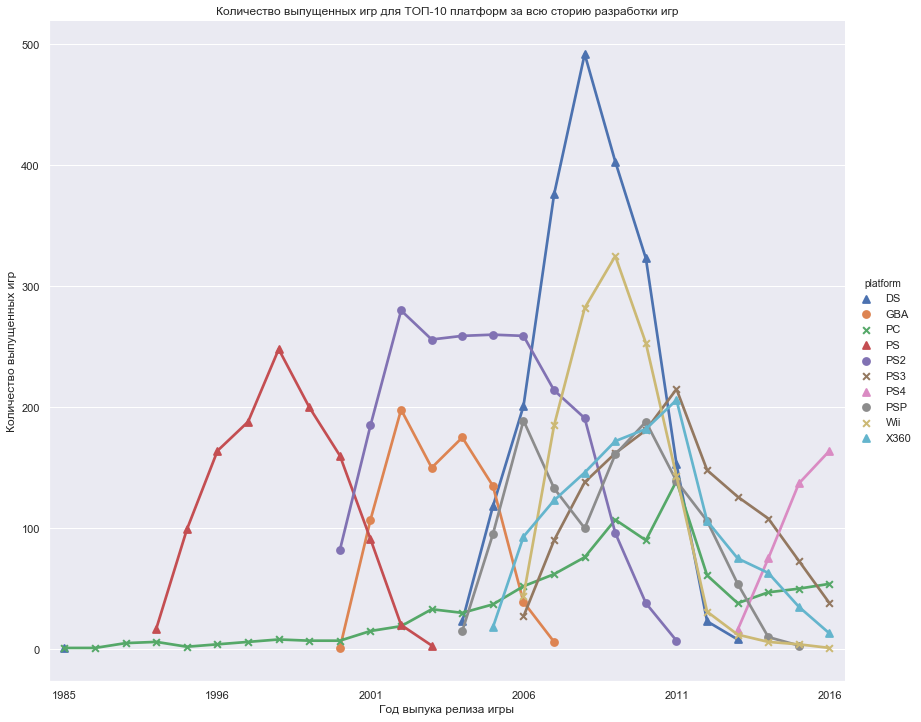

In [15]:
sns.set(style="darkgrid")

g = sns.catplot(x="year_of_release", 
            y="number_of_games", 
            hue="platform", 
            kind="point", 
            ci=None, 
            aspect=1.2,
            height=10,
            markers=["^","o","x","^","o","x","^","o","x","^"],
            data=top_ten_platforms_games_grouped
           )

g.set_xticklabels(step=5)
g.set_axis_labels("Год выпука релиза игры", "Количество выпущенных игр")
g.ax.set_title("Количество выпущенных игр для ТОП-10 платформ за всю сторию разработки игр")

### Из этих графиков видно следующее.

**"Продолжительность жизни"** платформы - **9-12 лет**. По графикам - **выход на популярность от 3 до 6 лет**. **Пик популярности - 3-5 лет.** Правда, все это не касается платформы PC. 

Нам необходимо <font color=green><b>брать во внимание только те платформы, для которых за последние 3 года выпускались игры</b></font>.

Также, исходя из жизненного цикла платформ, <font color=red><b>брать данные более чем за 6 последних лет нет смысла</b></font>.

Сформируем соответствующую выборку.

In [16]:
# Зададим массив годов для отбора актуальных платформ
years_of_stastistics = [2014,2015,2016]

# Отберем платформы, для которых был выпуск игр за эти годы
platforms_for_analysis = games_data.query('year_of_release in @years_of_stastistics')['platform'].unique()

# Зададим массив годов для отбора данных для анализа
years_of_data_analysis = [2011,2012,2013,2014,2015,2016]

# Выберем данные по этим платформам
games_data_for_analysis = (games_data.query('(platform in @platforms_for_analysis)&(year_of_release in @years_of_data_analysis)').
                           sort_values(by='all_sales',ascending=False))

games_data_for_analysis.sample(10)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,all_sales,other_sales,critic_score,user_score,rating
15108,Bella Sara 2 - The Magic of Drasilmare,3DS,2013,Adventure,0.00,0.02,0.00,0.02,0.00,-1,-1,ND
10252,Wasteland 2,PS4,2015,Role-Playing,0.08,0.00,0.02,0.12,0.02,-1,-1,ND
12534,Project Setsuna,PS4,2016,Role-Playing,0.00,0.00,0.06,0.06,0.00,-1,-1,ND
457,Animal Crossing: Happy Home Designer,3DS,2015,Simulation,0.51,1.02,1.40,3.05,0.12,66,69,E
14173,Even in a Game Listen to Me Girls. I Am Your F...,PSP,2012,Action,0.00,0.00,0.03,0.03,0.00,-1,-1,ND
7534,Valkyria Chronicles,PS4,2016,Role-Playing,0.07,0.05,0.05,0.20,0.03,-1,-1,ND
16045,Turbo: Super Stunt Squad,3DS,2013,Sports,0.00,0.01,0.00,0.01,0.00,-1,52,E
11436,Adventure Time: The Secret of the Nameless Kin...,3DS,2014,Action,0.00,0.07,0.00,0.07,0.00,65,56,E10+
10216,Samurai Warriors 4,PSV,2014,Action,0.00,0.00,0.11,0.11,0.00,76,86,T
5338,TrackMania Turbo,PS4,2016,Action,0.03,0.26,0.00,0.34,0.05,81,79,E


Для полученной выборки также <font color=magenta><b>построим график популярности среди разработчиков</s></font>.

Text(0.5, 1, 'Количество выпущенных игр за последние 6 лет для актуальных платформ')

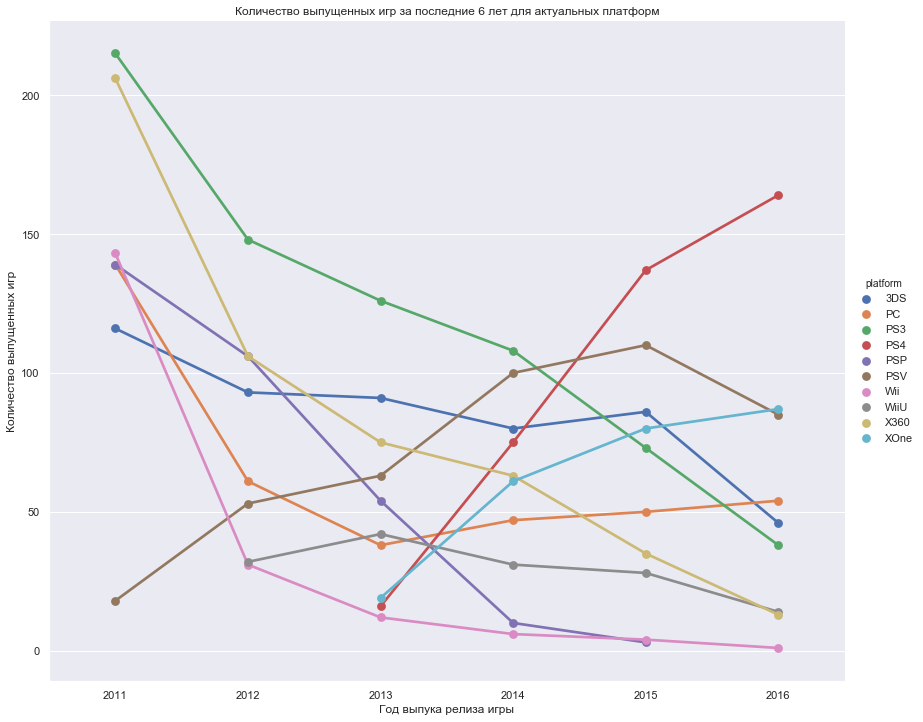

In [17]:
# Сформируем сводную таблицу по выпущенным играм
all_platforms_games_pivot = games_data_for_analysis.pivot_table(index = ['platform','year_of_release'],
                                                                         values = ['all_sales'], 
                                                                         aggfunc = ['count'])

all_platforms_games_pivot.columns = ['number_of_games']

all_platforms_games_grouped = all_platforms_games_pivot.reset_index()

# Построим такой же график для этой таблицы
g = sns.catplot(x="year_of_release", 
            y="number_of_games", 
            hue="platform", 
            kind="point", 
            data=all_platforms_games_grouped,
            ci=None, 
            aspect=1.2,
            height=10,
            markers="o"
            )
g.set_axis_labels("Год выпука релиза игры", "Количество выпущенных игр")
g.ax.set_title("Количество выпущенных игр за последние 6 лет для актуальных платформ")

### На основании этих графиков можно сделать следующие выводы.

 1. Среди разработчиков игр растет популярность таких платформ как **XOne и PS4**. 
 2. **PSV** находится на пике популярности.
 3. **PC** - платформа не стареющая.
 4. Остальные платформы теряют популярность за последние 6 лет.

*Теперь посмотрим, продажа игр на каких платформах приносит больше дохода.*

Text(0.5, 1, 'Объем продаж за последние 6 лет для актуальных платформ')

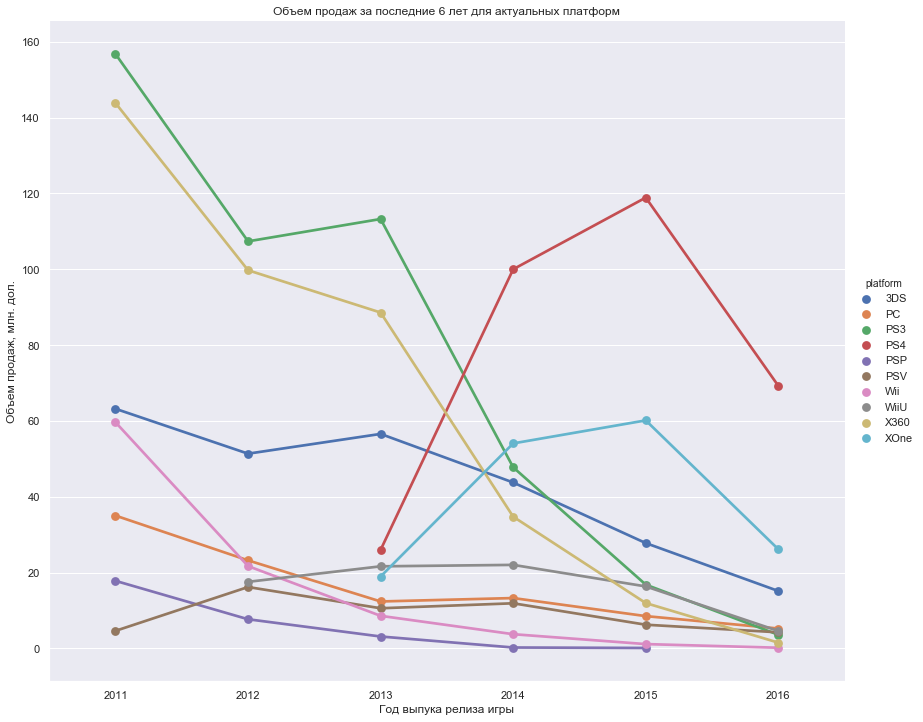

In [18]:
# Сформируем выборку по объемам продаж за последние шесть лет в разрезе платформ 
all_platforms_sales_pivot = games_data_for_analysis.pivot_table(index = ['platform','year_of_release'],
                                                                         values = ['all_sales'], 
                                                                         aggfunc = ['sum'])

all_platforms_sales_pivot.columns = ['sales_of_games']

all_platforms_sales_grouped = all_platforms_sales_pivot.reset_index()

# Построим такой же график для этой выборки
g = sns.catplot(x="year_of_release", 
            y="sales_of_games", 
            hue="platform", 
            kind="point", 
            data=all_platforms_sales_grouped.query('year_of_release != 0'),
            ci=None, 
            aspect=1.2,
            height=10,
            markers="o"
            )
g.set_axis_labels("Год выпука релиза игры", "Объем продаж, млн. дол.")
g.ax.set_title("Объем продаж за последние 6 лет для актуальных платформ")

### Выводы на основании полученных графиков:

 1. Данные за 2016 год не полные.
 2. Можно однозначно выделить лидеров. Это две платформы - **XOne и PS4**. 
 3. Также пока еще популярна платформа **3DS**.
 4. В пятерку лидеров также входят **PSV и PC**.

Займемся статистическим анализом данных. Для этого <font color=blue><b>отберем данные по этим пяти платформам за период с 2011 года и проведем анализ продаж по ним</b></font>.

(0, 1.75)

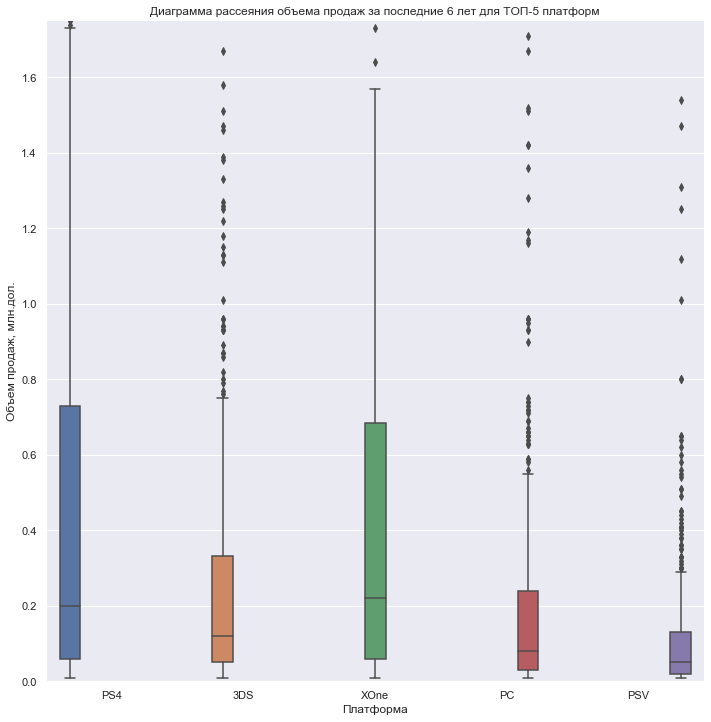

In [19]:
top_five_platforms_per_incomes = ['XOne','PS4','PSV','3DS','PC']
games_data_top_five_analysis = games_data_for_analysis.query('platform in @top_five_platforms_per_incomes')

g = sns.catplot(x="platform", 
                y="all_sales", 
                hue="platform", 
                kind="box", 
                height=10,
                data=games_data_top_five_analysis
               )
g.set_axis_labels("Платформа", "Объем продаж, млн.дол.")
g.ax.set_title("Диаграмма рассеяния объема продаж за последние 6 лет для ТОП-5 платформ")
plt.ylim(0,1.75)

<font color=blue><b>Медианное значение объемов продаж игр на каждой платформе не выходит за 0,25</b></font>. Для того, чтобы получить более информативную картину, <font color=blue><b>построим диаграмму, на которй будет наглядно видно средние и медианные продажи для каждой из платформ</b></font>.

In [20]:
# Сформируем функцию для подготовки таблицы со средним и медианой по категориальной переменной
def cat_mean_median_dataset(category_name,
                            value_name,
                            dataset):

    data_pivot = dataset.pivot_table(index = [category_name],
                                     values = [value_name], 
                                     aggfunc = ['mean','median'])

    data_pivot.columns = ['all_sales_mean','all_sales_median']

    data_grouped = data_pivot.reset_index()

    # Обработаем таблицу для построения графика
    data_grouped_mean = data_grouped[[category_name,'all_sales_mean']]
    data_grouped_median = data_grouped[[category_name,'all_sales_median']]

    data_grouped_mean.columns = [category_name,'all_sales']
    data_grouped_median.columns = [category_name,'all_sales']

    data_grouped_mean['indicator']='mean'
    data_grouped_median['indicator']='median'

    return pd.concat([data_grouped_mean, data_grouped_median],axis=0)

Text(0.5, 1, 'Сравнительная гистограмма средней и медианы объема продаж за последние 6 лет для ТОП-5 платформ')

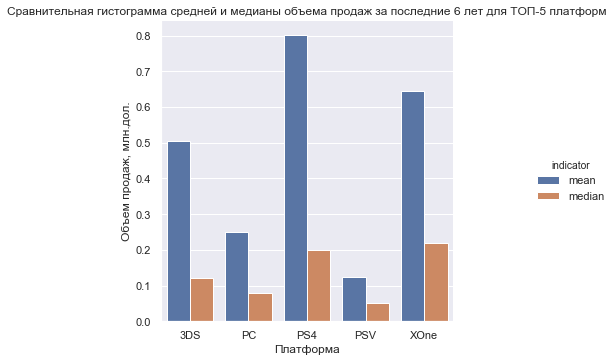

In [21]:
# Сформируем сводную таблицу по платформам со средним и медианой
games_top_five_platform_indicators = cat_mean_median_dataset(category_name = 'platform',
                                                             value_name = 'all_sales',
                                                             dataset = games_data_top_five_analysis)

# Построим сравнительную диаграмму
g = sns.catplot(x="platform", 
                y="all_sales", 
                hue="indicator", 
                kind="bar",
                data=games_top_five_platform_indicators)

g.set_axis_labels("Платформа", "Объем продаж, млн.дол.")
g.ax.set_title("Сравнительная гистограмма средней и медианы объема продаж за последние 6 лет для ТОП-5 платформ")

**На графике различие между средним и медианой видно наглядно**. Это значит, что <font color=magenta><b>есть небольшое количество популярных игр</b></font> на каждой из платформ, <font color=magenta><b>продажи которых существенно выше, чем всех остальных игр</b></font>. Они и <font color=magenta><b>влияют на среднее значение</b></font>. 

Теперь возьмем самую **популярную платформу (PS4)** и посмотрим, как **на продажи игр на ней влияет мнение пользователей и критиков**.

Text(0.5, 1, 'График зависимости объема продаж от рейтинга пользователей (для платформы PS4)')

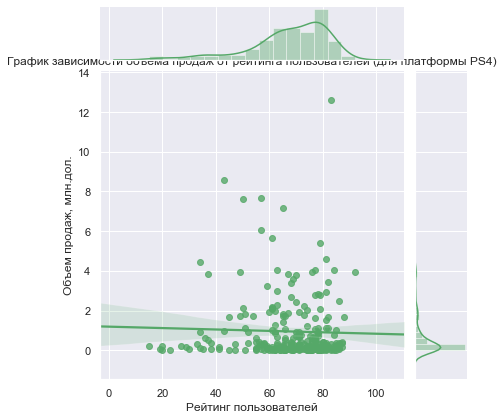

In [22]:
# Отберем таблицу по платформе PS4
games_data_ps4_analysis = games_data_top_five_analysis.query('platform == "PS4"')

# построим график зависимости продаж от мнения пользователей
g = sns.jointplot(x="user_score", 
                  y="all_sales", 
                  kind="reg",
                  truncate=False,
                  color="g",
                  data=games_data_ps4_analysis.query('user_score > 0'))

g.set_axis_labels("Рейтинг пользователей", "Объем продаж, млн.дол.")
plt.title("График зависимости объема продаж от рейтинга пользователей (для платформы PS4)")

Text(0.5, 1, 'График зависимости объема продаж от рейтинга критиков (для платформы PS4)')

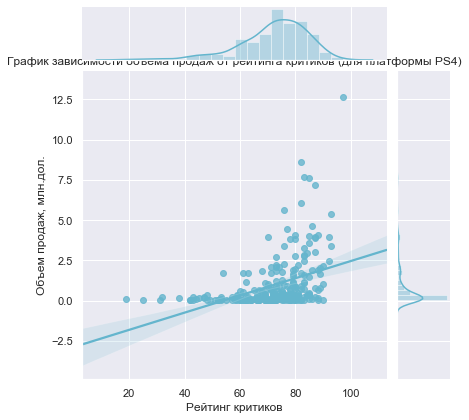

In [23]:
# построим график зависимости продаж от мнения критиков
g = sns.jointplot(x="critic_score", 
                  y="all_sales",
                  kind="reg",
                  truncate=False,
                  color="c",
                  data=games_data_ps4_analysis.query('critic_score > 0'))

g.set_axis_labels("Рейтинг критиков", "Объем продаж, млн.дол.")
plt.title("График зависимости объема продаж от рейтинга критиков (для платформы PS4)")

### Вывод из этих двух графиков:

<font color=green><b>Ни мнения критиков, ни мнения пользователей существенно не влияют на продажи игр на PS4</b></font>.

*Для верности приведем еще коэффициенты корреляции значений.*

In [24]:
# Напишем функцию для вывода коэффициента корреляции и определения существенности

def df_corellation(df_in, 
                   frame_name, 
                   column1_name, 
                   column2_name, 
                   first_parametr_name,
                   second_parametr_name
                  ):

    # Вычислим коэффициент корреляции
    coef_correlation = df_in[column1_name].corr(df_in[column2_name])
    
    # Выведем шапку
    print(frame_name, 
          'Вычислим зависимость', 
          second_parametr_name,
          'от', 
          first_parametr_name)
    
    print('')
    print('Коэф. корреляции:', coef_correlation)
    print('')

    # Выведем вывод
    if coef_correlation == 0:
        print('Зависимости между параметрами нет')
    elif coef_correlation > 0:
        if coef_correlation > 0.7:
            print('Зависимость сильная, чем выше', 
                  first_parametr_name, 'тем выше объем', 
                  second_parametr_name)
        elif coef_correlation > 0.3:
            print('Зависимость средняя, чем выше', 
                  first_parametr_name, 'тем выше объем', 
                  second_parametr_name)
        else:
            print('Зависимость слабая, чем выше', 
                  first_parametr_name, 'тем выше объем', 
                  second_parametr_name)
    else:        
        if coef_correlation < -0.7:
            print('Зависимость сильная, чем выше', 
                  first_parametr_name, 'тем ниже объем', 
                  second_parametr_name)
        elif coef_correlation < -0.3:
            print('Зависимость средняя, чем выше', 
                  first_parametr_name, 'тем ниже объем', 
                  second_parametr_name)
        else:
            print('Зависимость слабая, чем выше', 
                  first_parametr_name, 'тем ниже объем', 
                  second_parametr_name)
    print('')


In [25]:
df_corellation(df_in = games_data_ps4_analysis.query('critic_score > 0'), 
               frame_name = 'Данные для PS4.', 
                   column1_name = 'critic_score', 
                   column2_name = 'all_sales', 
                   first_parametr_name = 'оценки критиков',
                   second_parametr_name = 'мировых продаж игры'
                  )

df_corellation(df_in = games_data_ps4_analysis.query('user_score > 0'), 
               frame_name = 'Данные для PS4.', 
                   column1_name = 'user_score', 
                   column2_name = 'all_sales', 
                   first_parametr_name = 'оценки пользователей',
                   second_parametr_name = 'мировых продаж игры'
                  )

Данные для PS4. Вычислим зависимость мировых продаж игры от оценки критиков

Коэф. корреляции: 0.40656790206178095

Зависимость средняя, чем выше оценки критиков тем выше объем мировых продаж игры

Данные для PS4. Вычислим зависимость мировых продаж игры от оценки пользователей

Коэф. корреляции: -0.03195711020455644

Зависимость слабая, чем выше оценки пользователей тем ниже объем мировых продаж игры



*Построим такие же графики и посчитаем коэффициенты корреляции без зависимости от платформы*

Text(0.5, 1, 'График зависимости объема продаж от рейтинга пользователей (для всех платформ)')

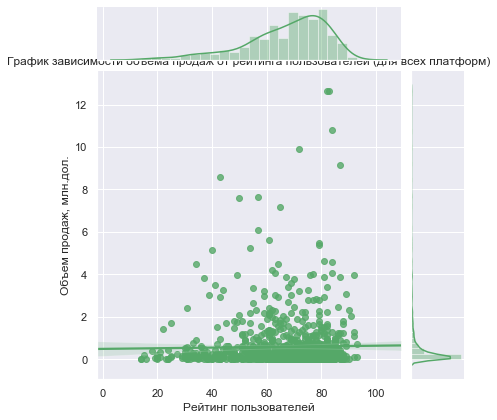

In [26]:
# построим график зависимости продаж от мнения пользователей
g = sns.jointplot(x="user_score", 
                  y="all_sales", 
                  kind="reg",
                  truncate=False,
                  color="g",
                  data=games_data_top_five_analysis.query('user_score > 0'))

g.set_axis_labels("Рейтинг пользователей", "Объем продаж, млн.дол.")
plt.title("График зависимости объема продаж от рейтинга пользователей (для всех платформ)")

Text(0.5, 1, 'График зависимости объема продаж от рейтинга критиков (для всех платформ)')

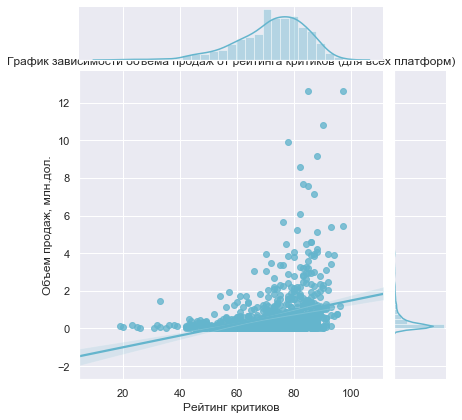

In [27]:
# построим график зависимости продаж от мнения критиков
g = sns.jointplot(x="critic_score", 
                  y="all_sales", 
                  kind="reg",
                  truncate=False,
                  color="c",
                  data=games_data_top_five_analysis.query('critic_score > 0'))

g.set_axis_labels("Рейтинг критиков", "Объем продаж, млн.дол.")
plt.title("График зависимости объема продаж от рейтинга критиков (для всех платформ)")

In [28]:
df_corellation(df_in = games_data_top_five_analysis.query('critic_score > 0'), 
               frame_name = 'Данные для всех платформ.', 
                   column1_name = 'critic_score', 
                   column2_name = 'all_sales', 
                   first_parametr_name = 'оценки критиков',
                   second_parametr_name = 'мировых продаж игры'
                  )

df_corellation(df_in = games_data_top_five_analysis.query('user_score > 0'), 
               frame_name = 'Данные для всех платформ.', 
                   column1_name = 'user_score', 
                   column2_name = 'all_sales', 
                   first_parametr_name = 'оценки пользователей',
                   second_parametr_name = 'мировых продаж игры'
                  )

Данные для всех платформ. Вычислим зависимость мировых продаж игры от оценки критиков

Коэф. корреляции: 0.30648543825766883

Зависимость средняя, чем выше оценки критиков тем выше объем мировых продаж игры

Данные для всех платформ. Вычислим зависимость мировых продаж игры от оценки пользователей

Коэф. корреляции: 0.018563114787375046

Зависимость слабая, чем выше оценки пользователей тем выше объем мировых продаж игры



*На всех платформах - та же ситуация. Если влияние оценки критиков еще хоть немного влияет на продажи, то мнение пользователей нет.*

(0, 1.4)

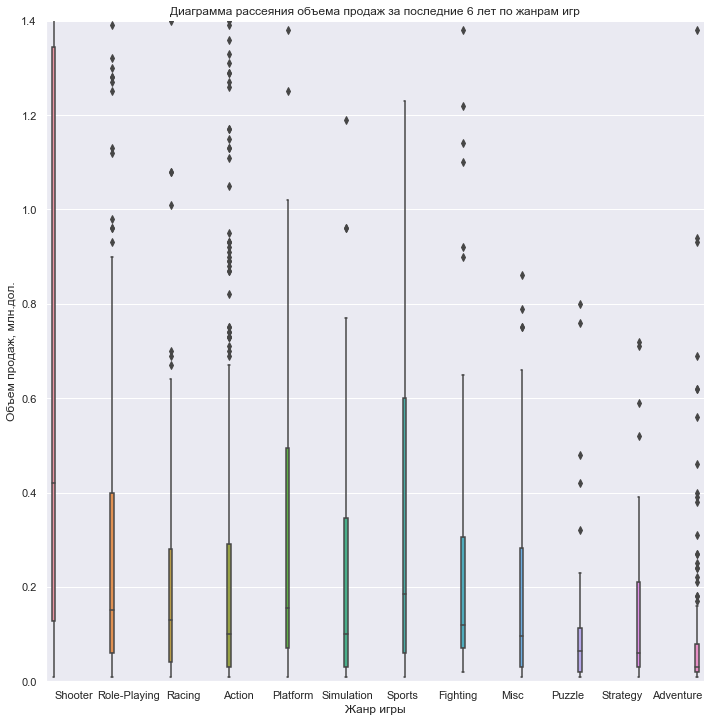

In [29]:

g = sns.catplot(x="genre", 
                y="all_sales", 
                hue="genre", 
                kind="box", 
                height=10,
                data=games_data_top_five_analysis
               )

g.set_axis_labels("Жанр игры", "Объем продаж, млн.дол.")
g.ax.set_title("Диаграмма рассеяния объема продаж за последние 6 лет по жанрам игр")
plt.ylim(0,1.4)

<font color=red><b>График получается не очень информативным. Гораздо нагляднее будет диаграмма со средними и медианными значениями по жанрам.</b></font>

Text(0.5, 1, 'Сравнительная гистограмма средней и медианы объема продаж за последние 6 лет по жанрам игр')

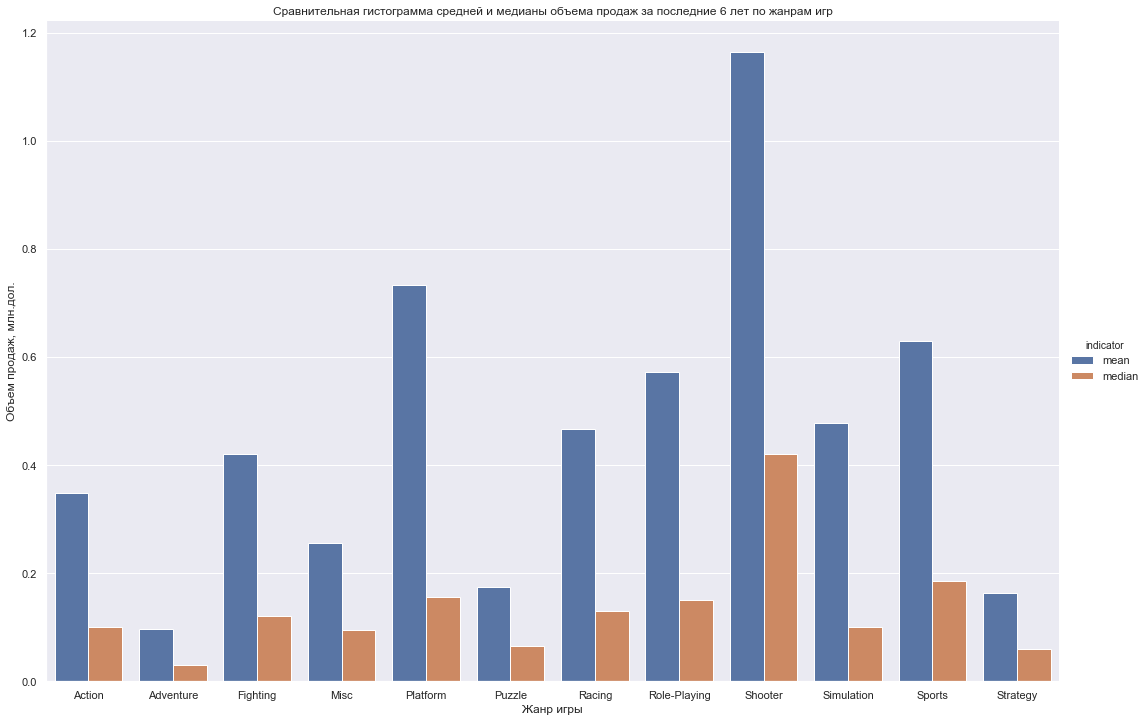

In [30]:
# Сформируем сводную таблицу по жанрам со средним и медианой
games_top_five_genres_grouped_indicators = cat_mean_median_dataset(category_name = 'genre',
                                                                   value_name = 'all_sales',
                                                                   dataset = games_data_top_five_analysis)

# Построим сравнительную диаграмму
g = sns.catplot(x="genre", 
                y="all_sales", 
                hue="indicator", 
                kind="bar",
                height=10,
                aspect=1.5,
                data=games_top_five_genres_grouped_indicators)

g.set_axis_labels("Жанр игры", "Объем продаж, млн.дол.")
g.ax.set_title("Сравнительная гистограмма средней и медианы объема продаж за последние 6 лет по жанрам игр")

## <span style="color:orange">Что можно улучшить<span>
Дополнительно, я бы отсортировал данные либо по среднему, либо по медиане, так станет лучше

<font color=green><b>Пятерка лучших жанров по средним продажам:</b></font>
 1. <font color=green>'Shooter'</font>
 2. <font color=green>'Platform'</font>
 3. <font color=green>'Spotrs'</font>
 4. <font color=green>'Role-Playing'</font>
 5. <font color=green>'Simulation'</font>

<font color=green><b>Пятерка лучших жанров по медианным продажам:</b></font>
 1. <font color=green>'Shooter'</font>
 2. <font color=green>'Spotrs'</font>
 3. <font color=green>'Platform'</font>
 4. <font color=green>'Role-Playing'</font>
 5. <font color=green>'Fighting'</font>

Text(0.5, 1, 'Гистограмма объема продаж за последние 6 лет по видам игр')

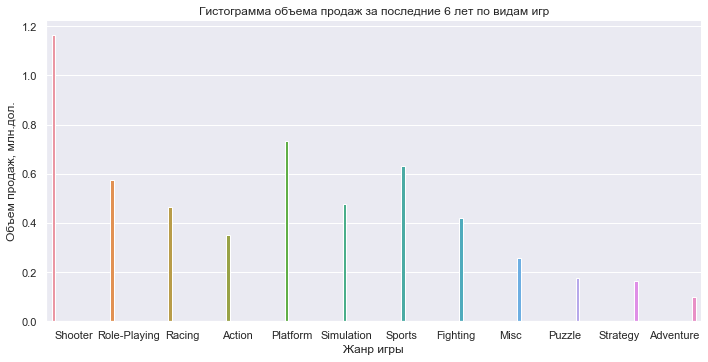

In [31]:
g = sns.catplot(x="genre", 
                y="all_sales",
                #orient = "h",
                hue="genre", 
                kind="bar", 
                data=games_data_top_five_analysis,
                ci=None, 
                aspect=2,
                height=5
                )

g.set_axis_labels("Жанр игры", "Объем продаж, млн.дол.")
g.ax.set_title("Гистограмма объема продаж за последние 6 лет по видам игр")

## <span style="color:orange">Что можно улучшить<span>
Дополнительно, я бы отсортировал данные либо по среднему, либо по медиане, так станет лучше

<font color=green><b>Пятерка лучших жанров по объему продаж:</b></font>
 1. <font color=green>'Shooter'</font>
 2. <font color=green>'Platform'</font>
 3. <font color=green>'Spotrs'</font>
 4. <font color=green>'Role-Playing'</font>
 5. <font color=green>'Simulation'</font>
 
Хуже всех продаются игры жанра <font color=red>'Adventure'</font>, немного лучше него - <font color=red>'Puzzle'</font> и <font color=red>'Strategy'</font>. При закупке игр, я бы на них не ставил.

### Шаг 4. Составление портрета пользователя каждого региона <a class="anchor" id="5-bullet"></a>
👈[назад к оглавлению](#0-bullet)

Т.к. магазин осуществляет продажи по всему миру, необходимо определить что же популярно среди пользователей различных регионов:

1. Определим наиболее популярные с точки зрения объемов продаж платформы.
2. Определим наиболее популярные жанры у пользователей каждого из регионов.
3. Проверим влияние рейтинга ESRB на продажи в каждом из регионов.

*Для начала посмотрим картину по платформам.*

In [32]:
# Напишем функцию, возвращающую топ-5 по входным параметрам
def top_five_categories(category_name,
                        value_name,
                        dataset):
    
    dataset_pivot = dataset.pivot_table(index = [category_name],
                                                     values = [value_name], 
                                                     aggfunc = ['sum'])
    dataset_pivot.columns = ['sales_of_games']

    dataset_grouped = dataset_pivot.reset_index()
    return dataset_grouped.sort_values(by='sales_of_games',ascending=False).head()    


In [33]:
# Определим топ 5 платформ для региона NA
na_sales_platform = top_five_categories(category_name = 'platform',
                                        value_name = 'na_sales',
                                        dataset = games_data_for_analysis)

na_sales_platform

,platform,sales_of_games
8,X360,226.80
2,PS3,168.26
3,PS4,108.74
9,XOne,93.12
0,3DS,82.65


In [34]:
# Определим топ 5 платформ для региона EU
eu_sales_platform = top_five_categories(category_name = 'platform',
                                        value_name = 'eu_sales',
                                        dataset = games_data_for_analysis)

eu_sales_platform

,platform,sales_of_games
2,PS3,163.10
3,PS4,141.09
8,X360,117.10
0,3DS,61.27
1,PC,56.70


In [35]:
# Определим топ 5 платформ для региона JP
jp_sales_platform = top_five_categories(category_name = 'platform',
                                        value_name = 'jp_sales',
                                        dataset = games_data_for_analysis)

jp_sales_platform

,platform,sales_of_games
0,3DS,100.62
2,PS3,49.39
4,PSP,24.04
5,PSV,21.84
3,PS4,15.96


### Основной вывод следующий. 

<font color=orange><b>В Японии</b> преодбладают продажи игр для платформ местных производителей (при этом локальная <b>Nintendo</b> занимает первое место с существенным отрывом).</font>

<font color=blue><b>В Северной Америке</b> локальным производителем является <b>Microsoft</b>. Очевидно, что наиболее продаваемыми будут игры этого производителя.</font>

<font color=green><b>В Европе</b> же своего производителя консолей нет, поэтому там более-менее <b>ровные продажи по всем платформам</b>. В том числе и <b>в ТОП-5 вошли продажи игр для PC</b>.</font>

## <span style="color:orange">Что можно улучшить<span>
Дополнительно можно объединить три таблицы в одну. Пример ниже

In [36]:
pd.concat([eu_sales_platform.reset_index().drop('index', axis=1), 
           na_sales_platform.reset_index().drop('index', axis=1), 
           jp_sales_platform.reset_index().drop('index', axis=1)], axis=1)

,platform,sales_of_games,platform,sales_of_games,platform,sales_of_games
0,PS3,163.10,X360,226.80,3DS,100.62
1,PS4,141.09,PS3,168.26,PS3,49.39
2,X360,117.10,PS4,108.74,PSP,24.04
3,3DS,61.27,XOne,93.12,PSV,21.84
4,PC,56.70,3DS,82.65,PS4,15.96


*Теперь посмотрим картину по жанрам*

In [37]:
# Определим топ 5 жанров для региона NA
na_sales_genre = top_five_categories(category_name = 'genre',
                                        value_name = 'na_sales',
                                        dataset = games_data_for_analysis)

na_sales_genre

,genre,sales_of_games
0,Action,226.39
8,Shooter,194.18
10,Sports,108.31
7,Role-Playing,80.27
3,Misc,66.15


In [38]:
# Определим топ 5 жанров для региона EU
eu_sales_genre = top_five_categories(category_name = 'genre',
                                        value_name = 'eu_sales',
                                        dataset = games_data_for_analysis)

eu_sales_genre

,genre,sales_of_games
0,Action,196.58
8,Shooter,147.98
10,Sports,88.36
7,Role-Playing,60.52
6,Racing,40.12


In [39]:
# Определим топ 5 жанров для региона JP
jp_sales_genre = top_five_categories(category_name = 'genre',
                                        value_name = 'jp_sales',
                                        dataset = games_data_for_analysis)

jp_sales_genre

,genre,sales_of_games
7,Role-Playing,75.29
0,Action,62.78
3,Misc,16.86
2,Fighting,11.94
8,Shooter,11.92


Вкусы пользователей в <font color=blue><b>Cеверной Америке</b></font> и <font color=green><b>Европе</b></font> совпадают. Отличие только в жанре, находящемся на 5-м месте. В Европе это *гонки*, а в америке - *'Misc'*.

В <font color=orange><b>Японии</b></font> на первом месте *'Role-Playing'*. Также в пятерку вошли игры жанра *'Fighting'*. Видимо все делов особенностях менталитета.

Для полноты картины проведем оценку влияния рейтинга ESRB на продажи в разных регионах.

Text(0.5, 1, 'Гистограмма объема продаж в зависимости от рейтинга ESRB для Северной Америки')

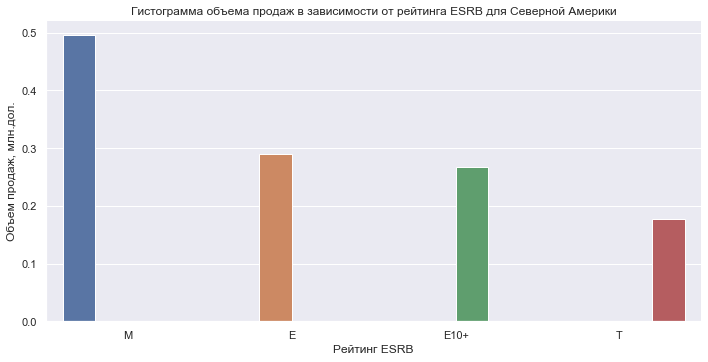

In [40]:
# построим график зависимости продаж от рейтинга ESRB для рынка NA
g = sns.catplot(x="rating", 
            y="na_sales",
            hue="rating", 
            kind="bar", 
            data=games_data_for_analysis.query('(rating != "ND")&(rating != "RP")'),
            ci=None, 
            aspect=2,
            height=5
            )

g.set_axis_labels("Рейтинг ESRB", "Объем продаж, млн.дол.")
g.ax.set_title("Гистограмма объема продаж в зависимости от рейтинга ESRB для Северной Америки")

Text(0.5, 1, 'Гистограмма объема продаж в зависимости от рейтинга ESRB для Европы')

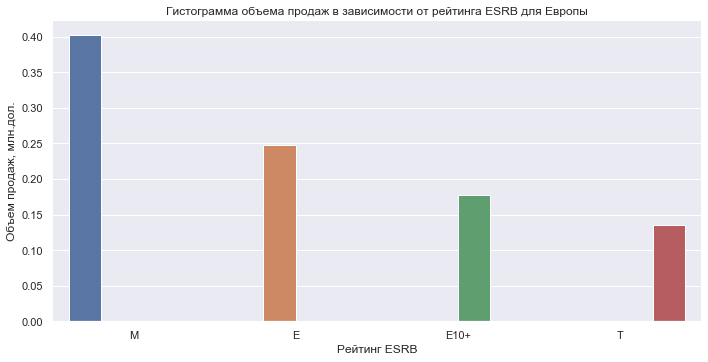

In [41]:
# построим график зависимости продаж от рейтинга ESRB для рынка EU
g = sns.catplot(x="rating", 
            y="eu_sales",
            hue="rating", 
            kind="bar", 
            data=games_data_for_analysis.query('(rating != "ND")&(rating != "RP")'),
            ci=None, 
            aspect=2,
            height=5
            )

g.set_axis_labels("Рейтинг ESRB", "Объем продаж, млн.дол.")
g.ax.set_title("Гистограмма объема продаж в зависимости от рейтинга ESRB для Европы")

Text(0.5, 1, 'Гистограмма объема продаж в зависимости от рейтинга ESRB для Японии')

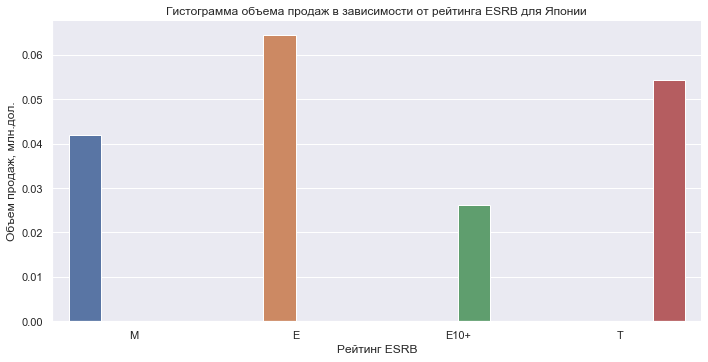

In [42]:
# построим график зависимости продаж от рейтинга ESRB для рынка JP
g = sns.catplot(x="rating", 
            y="jp_sales",
            hue="rating", 
            kind="bar", 
            data=games_data_for_analysis.query('(rating != "ND")&(rating != "RP")'),
            ci=None, 
            aspect=2,
            height=5
            )

g.set_axis_labels("Рейтинг ESRB", "Объем продаж, млн.дол.")
g.ax.set_title("Гистограмма объема продаж в зависимости от рейтинга ESRB для Японии")

В <font color=green><b>Европе</b></font> и <font color=blue><b>Америке</b></font> больше всего продается игр *для взрослых*, а игры *для подростков* продаются существенно меньше. Можно сказать, что рейтинг **не влияет** на продажи, т.к. подросткам интереснее играть во взрослые игры.

Что касается <font color=orange><b>Японии</b></font>, то тут как раз преобладают игры с рейтингом *для всех* и игры *для подростков*. Можно предположить что **в Японии на этот параметр обращают внимание**.

### Шаг 5. Проверка гипотез <a class="anchor" id="6-bullet"></a>
👈[назад к оглавлению](#0-bullet)

Для того, чтобы завершить наше исследование мы проверим два предположения, заданные нам:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров Action и Sports разные.


<font color=magenta>Есть <b>нулевая гипотеза</b>, что средние рейтинги пользователей платформы <b>XOne и PC - равны</b>. Проверим ее.</font>

<font color=darkgreen><b>Альтернативная гипотеза</b> - это своершенно две разных аудитории и <b>рейтинг игр существенно отличаентся</b>.</font>

Для подтверждения нулевой гипотезы выбираем **метод сравнения средних двух генеральных совокупностей**. Причина выбора: обе выборки у нас есть, дополнительных расчетов делать не надо, обе выборки взяты из схожих по параметрам совокупностям (оценка взята из одних и тех же источников).

In [43]:
# Напишем функцию проверки гипотезы равенства средних двух совокупностей, 
# чтобы несколько раз не повторять код

def check_null_hypotesis(dataframe1,
                         dataframe2,
                         column_name,
                         hypotesis_name):
    
    alpha = .05

    results = st.ttest_ind(
        dataframe1[column_name], 
        dataframe2[column_name],
        equal_var = True)
    
    print('-------------------------------------------------------------')
    print(hypotesis_name)
    print('-------------------------------------------------------------')

    print('p-значение: ', results.pvalue)
    print('')

    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

    print('-------------------------------------------------------------')
    print('')

In [44]:
# Сформируем выборки для двух платформ
games_data_xone = games_data_for_analysis.query('(platform == "XOne")&(user_score>0)')
games_data_pc = games_data_for_analysis.query('(platform == "PC")&(user_score>0)')

check_null_hypotesis(dataframe1 = games_data_xone,
                     dataframe2 = games_data_pc,
                     column_name = 'user_score',
                     hypotesis_name = 'Средние рейтинги платформ XOne и PC равны')

-------------------------------------------------------------
Средние рейтинги платформ XOne и PC равны
-------------------------------------------------------------
p-значение:  0.6267602271422468

Не получилось отвергнуть нулевую гипотезу
-------------------------------------------------------------



## <span style="color:red">Что необходимо доработать<span>
По поводу p-value:
- достигаемый уровень значимости не равен вероятности истинности нулевой гипотезы
- 1 – (достигаемый уровень значимости) не равно вероятности истинности альтернативной гипотезы;
- достигаемый уровень значимости не равен вероятности ошибки первого рода;
- 1 – (достигаемый уровень значимости) не равно вероятности ошибки второго рода;
- достигаемый уровень значимости не есть вероятность того, что повторный эксперимент не приведёт к тому же решению.
    
_p-value_ - это вероятность при справедливости нулевой гипотезы получить значение статистики, такое же или ещё более экстремальное (речь идет о t-статистике, не более)

<font color=red><b><s>Мы получили подтверждение того, что с вероятностью более 60% средние рейтинги для двух платформ одинаковые.</s></b></font>

Олег, согласен с тем, что сформулировал неверно. Корректной будет следующая формулировка:

<font color=darkgreen><b>Мы получили подтверждение того, что нулевая гипотеза верна. Средние рейтинги для двух платформ одинаковые. Вероятность получения такого же результата при любой другой выборке составляет более 60%. Это существенно выше выбранного порога стататистической значимости (5%).</b></font>


<font color=magenta>Теперь проверим <b>гипотезу</b> о том, что пользовательские рейтинги двух жанров - <b>'Action' и 'Sports' - разные</b>. <b>Нулевую гипотезу</b> мы в этом случае все равно <b>выдвигаем на равенство средних</b> генеральных совокупностей этих двух рейтингов.</font>

Для подтверждения нулевой гипотезы также выбираем **метод сравнения средних двух генеральных совокупностей**. Причина выбора: обе выборки у нас есть, дополнительных расчетов делать не надо, обе выборки взяты из схожих по параметрам совокупностям (оценка взята из одних и тех же источников).

In [45]:
# Сформируем выборки для двух платформ
games_data_action = games_data_for_analysis.query('(genre == "Action")&(user_score>0)')
games_data_sports = games_data_for_analysis.query('(genre == "Sports")&(user_score>0)')

check_null_hypotesis(dataframe1 = games_data_action,
                     dataframe2 = games_data_sports,
                     column_name = 'user_score',
                     hypotesis_name = 'Средние рейтинги жанров Action и Sports равны')

-------------------------------------------------------------
Средние рейтинги жанров Action и Sports равны
-------------------------------------------------------------
p-значение:  7.413356804472754e-24

Отвергаем нулевую гипотезу
-------------------------------------------------------------



**Таким образом средние рейтинги жанров Action и Sports разные. Гипотеза об их равенстве не подтвердилась.**

### Шаг 6. Общий вывод <a class="anchor" id="7-bullet"></a>
👈[назад к оглавлению](#0-bullet)

<font color=green><b>В предоставленных данных находится стория разработки и продажи всех компьютерных игр</b></font>, за всю историю существования индустрии <font color=green><b>(начиная с 1980 года)</b></font>. Ряд платформ, имеющихся в этой таблице уже не существует или существует только в узких комьюнити энтузиастов. <font color=green><b>Чтобы определить, какую же часть данных из имеющихся мы можем взять для анализа, мы провели ряд действий с исходной выборкой</b></font>.

Для начала мы провели анализ того, каков жизненный цикл платформ в компьютерной индустрии. Мы <font color=green><b>взяли ТОП-10 платформ с наибольшим объемом продаж</b></font> за весь период имеющихся данных о продажах игр и <font color=green><b>построили графики популярности этих платформ среди разработчиков игр</b></font>.

Из этих графиков видно то, что <font color=red><b>"Продолжительность жизни" платформы составляет от 9 до 12 лет</b></font>, <font color=green><b>выход от нуля на пик популярности - от 3 до 6 лет</b></font>. <font color=blue><b>Нахождение на пике популярности (плато) от 3 до 5 лет</b></font>. Единственная платформа, показывающая стабильные показатели - это PC. 

На основании полученных графиков <font color=blue><b>мы сделали вывод, что необходимо брать во внимание</b></font> только те <font color=blue><b>платформы, для которых за последние 3 года выпускались игры</b></font>. Это те платформы, которые популярны среди разработчиков, а значит находятся либо на подъеме, либо уже на пике популярности.

<font color=red><b>Для анализа популярности</b></font> тех или иных <font color=red><b>игр, брать данные более чем за 6 последних лет нет смысла</b></font>, т.к. в данных, которые старше, много данных об уже непопулярных платформах.

<font color=blue><b>Мы сформировали</b></font> соответствующую <font color=blue><b>выборку и на ее основании сделали следующие выводы</b></font>. <font color=blue><b>Популярными среди разработчиков являются платформы XOne и PS4</b></font>. Их популярность растет. <font color=blue><b>На пике популярности также находится платформа PSV</b></font>. <font color=blue><b>Стабильные показатели</b></font> из года в год <font color=blue><b>показывает платформа PC</b></font>. Остальные платформы в полученной выборке теряют популярность в течение последних 6 лет.

<font color=green><b>Анализ прибыльности платформ</b></font>. в полученной выборке <font color=green><b>дал несколько иные результаты</b></font>. Несмотря на неполноту данных за 2016 год, <font color=green><b>лучшими по прибыльности можно выделить XOne и PS4</b></font>. <font color=green><b>Немного отстает от них</b></font> теряющая популярность <font color=green><b>3DS. В пятерке также находятся PSV и PC</b></font>.

<font color=red><b>Статистический анализ</b></font> наиболее прибыльных платформ <font color=red><b>показал, что медиана продаж каждой из платформ существенно ниже, чем средние продажи</b></font>. <font color=red><b>Это значит, что есть небольшое количество популярных игр на каждой из платформ, продажи которых существенно выше, чем всех остальных игр</b></font>. Они и влияют на среднее значение.

Чтобы завершить анализ параметров, влияющих на продажи <font color=blue><b>мы взяли самую прибыльную платформу (PS4) и провели анализ, как на продажи игр на ней влияет мнение пользователей и критиков</b></font>.

<font color=blue><b>Анализ графиков</b></font> зависимости показателей <font color=blue><b>показал, что если мнения критиков влияют на продажи игр, то мнения пользователей существенно не влияют на продажи игр на PS4</b></font>. Это подтвердилось расчетом коэффициентов корреляции этих величин.

Коэффициент корреляции мировых продаж игр в зависимости от оценки критиков для платформы PS4 составил 0.40656790206178095.

Коэффициент корреляции мировых продаж игр в зависимости от оценки пользователей для платформы PS4 составил -0.03195711020455644

<font color=blue><b>Анализ графиков зависимости показателей без разделения по платформам также показал слабое влияние мнения критиков и отсутствие влияния мнения пользователей.</b></font> Коэффициенты корреляции: 0.30648543825766883 и 0.018563114787375046

Для того, чтобы определить наиболее выгодные жанры с точки зрения получения дохода, мы определили <font color=green><b>средние</b></font>, <font color=blue><b>медианные</b></font> и <font color=orange><b>общие</b></font> показатели доходности по жанрам. 

<font color=green><b>С точки зрения средних продаж - пятерка лучших жанров выглядит так:</b></font>
 1. <font color=green>'Shooter'</font>
 2. <font color=green>'Platform'</font>
 3. <font color=green>'Spotrs'</font>
 4. <font color=green>'Role-Playing'</font>
 5. <font color=green>'Simulation'</font>

<font color=blue><b>С точки зрания медианы так:</b></font>
 1. <font color=blue>'Shooter'</font>
 2. <font color=blue>'Spotrs'</font>
 3. <font color=blue>'Platform'</font>
 4. <font color=blue>'Role-Playing'</font>
 5. <font color=blue>'Fighting'</font>
 
<font color=orange><b>А с точки зрения объемов продаж так:</b></font>
 1. <font color=orange>'Shooter'</font>
 2. <font color=orange>'Platform'</font>
 3. <font color=orange>'Spotrs'</font>
 4. <font color=orange>'Role-Playing'</font>
 5. <font color=orange>'Simulation'</font>

<font color=red><b>Средний доход от продажи игр в разрезе жанров также существенно выше, чем медианный. Это необходимо учитывать при планировании объемов продаж</b></font>. 

Хуже всех продаются игры жанра <font color=darkred>'Adventure'</font>, немного лучше него - <font color=darkred>'Puzzle'</font> и <font color=darkred>'Strategy'</font>.

**Исследование было бы не полным, если бы мы не провели анализ данных о продажах для разных платформ и жанров в разрезе регионов. Например, очень показателен анализ популярности платформ в различных регионах.**

<font color=orange><b>В Японии</b>, например преодбладают продажи игр для платформ местных производителей (при этом локальная <b>Nintendo</b> занимает первое место с существенным отрывом).</font>

<font color=blue><b>В Северной Америке</b> локальным производителем является <b>Microsoft</b>. Очевидно, что наиболее продаваемыми будут игры этого производителя.</font>

<font color=green><b>В Европе</b> же своего производителя консолей нет, поэтому там более-менее <b>ровные продажи по всем платформам</b>. В том числе и <b>в ТОП-5 вошли продажи игр для PC</b>.</font>

С точки зрений ТОП-% жанров, то в <font color=blue><b>Cеверной Америке</b></font> и <font color=green><b>Европе</b></font> вкусы пользователей отличаются только 5-м местом. В Европе это *гонки*, а в америке - *'Misc'*. Первые четыре места по версии европейских и американских пользователей, голосующих рублем (извините, долларом и евро):

 1. Action
 2. Shooter
 3. Sports
 4. Role-Playing

В <font color=orange><b>Японии</b></font> на первом месте *'Role-Playing'*. Также в пятерку вошли игры жанра *'Fighting'*. Видимо все делов особенностях менталитета. Однако, в пятерку также входят *'Action'* и *'Shooter'*.

Рейтинг ESRB, похоже влияет на продажи только в Японии. Такой вывод можно сделать из того, что в <font color=green><b>Европе</b></font> и <font color=blue><b>Америке</b></font> больше всего продается игр *для взрослых*, а игры *для подростков* продаются существенно меньше. Мы знаем о том, что подросткам интереснее играть во взрослые игры, а не вы игры с ограничениями. А вот в <font color=orange><b>Японии</b></font>, как раз преобладают игры с рейтингом *для всех* и игры *для подростков*. Поэтому, можно предположить что в Японии на этот параметр обращают внимание.

Наконец, чтобы завершить исследование, мы сделали два предположения (гипотезы):

 1. Мы предположили, что, т.к. платформы XOne и PC, это платформы Microsoft, то <b>средний рейтинг</b> пользователей платформы <b>XOne и PC - одинаковый</b>. Это предположение не опроверглось.
 
 2. Второе предположение, что пользовательские рейтинги двух жанров - <b>'Action' и 'Sports' - разные</b>. Т.к. проверить на разность мы не можем, то мы выдвинули гипотезу, что они равны. Гипотеза не подтвердилась, соответственно средние рейтинги пользователей этих двух жанров - различаются.


<font color=blue><b>Итоговые рекомендации следующие.</b></font> 

Чтобы получить наиболее полный охват аудитории, необходимо ориентироваться на консоли от <font color=blue><b>Microsoft (Х360 и набирающая популярность XOne)</b></font>, <font color=orange><b>Sony (PS3 и PS4) и Nintendo 3DS</b></font>.

Рекомендуемые жанры - <font color=green><b>Action, Shooter, Sports, Role-Playing, Misc и Fighting</b></font> (популярный у японской аудитории).
